# Завдання 1

Імпортуємо бібліотеки

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math


Пропишемо функції, які задаватимуть всі методи (5 штук) розв'язання дифрівнянь 1 порядку

In [ ]:
# Явний метод Ейлера
def Euler(function,h, t0, tf, x0): #задаємо назву методу,що залежить від рівняння; від кроку, з яким його будемо розв'язувати; та початкового і кінцевого часів розв'язку; та початкової умови
# function - функція, задана дифрівнянням, яка визначає швидкість приросту координати
    n=math.ceil((tf-t0)/h) #обчислюємо кількість кроків
    t=[round(t0+i*h,3) for i in range(n+1)] #Створюємо таблицю дискретного часу
    x=[x0] #Створюємо масив, який поки що містить 1 елемент (нульовий елемент - початкова умова)
    # x1=[] Рядок формує заготовку для таблиці швидкостей зростання функції - 1 похідна
    for i in range(n): # Заходимо в цикл, що складається з n кроків
        # x1=x1+[function(t[i], x[i])] Рядок заповнює таблицю швидкостей
        x=x+[round(x[i]+h*function(t[i], x[i]),3)] # Додаємо до таблиці координат новобчислений елемент, що міститься в квадратних дужках
    return  (t,x,(h,t0,tf,x0,'Explicit Euler')) #Результат, який отримаємо при виклику функції


# Неявний метод Ейлера
def EulerImp(functionImplicit,h, t0, tf, x0): #задаємо назву методу,що залежить від рівняння; від кроку, з яким його будемо розв'язувати; та початкового і кінцевого часів розв'язку; та початкової умови
# functionImplicit - функція, виведена з дифрівняння для неявного методу Ейлера
    n=math.ceil((tf-t0)/h) #обчислюємо кількість кроків
    t=[round(t0+i*h,3) for i in range(n+1)] #Створюємо таблицю дискретного часу
    x=[x0] #Створюємо масив, який поки що містить 1 елемент (нульовий елемент - початкова умова)
    for i in range(n): # Заходимо в цикл, що складається з n кроків
        x=x+[round(functionImplicit(t[i+1], x[i], h),3)] # Додаємо до таблиці координат новобчислений елемент, що міститься в квадратних дужках
    return  (t,x,(h,t0,tf,x0,'Implicit Euler')) #Результат, який отримаємо при виклику функції

# Метод Рунге-Кути
def Runge(function,h, t0, tf, x0): #задаємо назву методу,що залежить від рівняння; від кроку, з яким його будемо розв'язувати; та початкового і кінцевого часів розв'язку; та початкової умови
# function - функція, задана дифрівнянням, яка визначає швидкість приросту координати
    n=math.ceil((tf-t0)/h) #обчислюємо кількість кроків
    t=[round(t0+i*h,3) for i in range(n+1)] #Створюємо таблицю дискретного часу
    x=[x0] #Створюємо масив, який поки що містить 1 елемент (нульовий елемент - початкова умова)
    # x1=[] Рядок формує заготовку для таблиці швидкостей зростання функції - 1 похідна
    for i in range(n): # Заходимо в цикл, що складається з n кроків
        k1=function(t[i],x[i]) #Обчислюємо к1 за м. Рунге-Кути 4 порядку
        k2=function(t[i]+h/2,x[i]+h*k1/2)
        k3=function(t[i]+h/2,x[i]+h*k2/2)
        k4=function(t[i]+h,x[i]+h*k3)
        x=x+[round(x[i]+h/6*(k1+2*k2+2*k3+k4),3)] # Додаємо до таблиці координат новобчислений елемент, що міститься в квадратних дужках
    return  (t,x,(h,t0,tf,x0,'Runge 4 order')) #Результат, який отримаємо при виклику функції


# Метод Адамса
def Adams2E(function,h, t0, tf, x0): #задаємо назву методу,що залежить від рівняння; від кроку, з яким його будемо розв'язувати; та початкового і кінцевого часів розв'язку; та початкової умови
# function - функція, задана дифрівнянням, яка визначає швидкість приросту координати
    n=math.ceil((tf-t0)/h) #обчислюємо кількість кроків
    t=[round(t0+i*h,3) for i in range(n+1)] #Створюємо таблицю дискретного часу
    x=[x0] #Створюємо масив, який поки що містить 1 елемент (нульовий елемент - початкова умова)
    # x1=[] Рядок формує заготовку для таблиці швидкостей зростання функції - 1 похідна
    # Перший крок робимо за Рунге
    i=0
    k1=function(t[i],x[i]) #Обчислюємо к1 за м. Рунге-Кути 4 порядку
    k2=function(t[i]+h/2,x[i]+h*k1/2)
    k3=function(t[i]+h/2,x[i]+h*k2/2)
    k4=function(t[i]+h,x[i]+h*k3)
    x=x+[round(x[i]+h/6*(k1+2*k2+2*k3+k4),3)] # Додаємо до таблиці координат новобчислений елемент, що міститься в квадратних дужках
    for i in range(n-1): # Заходимо в цикл, що складається з (n-1) кроків
        x=x+[round(x[i+1]+3/2*h*function(t[i+1],x[i+1])-h/2*function(t[i],x[i]),3)]
    return  (t,x,(h,t0,tf,x0,'Adams 2-points Explicit')) #Результат, який отримаємо при виклику функції

# Неявний метод Адамса
def Adams2I(functionImplicitAdams,function, h, t0, tf, x0): #задаємо назву методу,що залежить від рівняння; від кроку, з яким його будемо розв'язувати; та початкового і кінцевого часів розв'язку; та початкової умови
# functionImplicit - функція, виведена з дифрівняння для неявного методу Ейлера
    n=math.ceil((tf-t0)/h) #обчислюємо кількість кроків
    t=[round(t0+i*h,3) for i in range(n+1)] #Створюємо таблицю дискретного часу
    x=[x0] #Створюємо масив, який поки що містить 1 елемент (нульовий елемент - початкова умова)
    # Перший крок робимо за Рунге
    i=0
    k1=function(t[i],x[i]) #Обчислюємо к1 за м. Рунге-Кути 4 порядку
    k2=function(t[i]+h/2,x[i]+h*k1/2)
    k3=function(t[i]+h/2,x[i]+h*k2/2)
    k4=function(t[i]+h,x[i]+h*k3)
    x=x+[round(x[i]+h/6*(k1+2*k2+2*k3+k4),3)] # Додаємо до таблиці координат новобчислений елемент, що міститься в квадратних дужках
    for i in range(n-1): # Заходимо в цикл, що складається з (n-1) кроків
        x=x+[round(functionImplicitAdams(t[i], x[i], x[i+1], h),3)] # Додаємо до таблиці координат новобчислений елемент, що міститься в квадратних дужках t[i+1]=t[i]+h, t[i+2]=t[i]+2*h
    return  (t,x,(h,t0,tf,x0,'Adams 2-points Implicit')) #Результат, який отримаємо при виклику функції

Задаємо функцію для аналізу стійкості

In [ ]:
def Stiykist (Method, function, solution, H, t0, tf, x0): #задаємо назву методу, буде розв'язувати задане рівняння при даній початковій умові з різними кроками з масиву Н
    plt.ylabel('x') # Підпис горизонтальної осі
    plt.xlabel('t') # Підпис вертикальної осі
    plt.grid(True) # Увімкнення сітки
    # plt.ylim(0,1.0) Рядок задавав би межі по вертикалі, ми зробили їх автоматичними
    plt.xlim(t0,tf) #Задає межі по горизонталі
    for i in range(len(H)): #Входимо в цикл, кількість повторень - кількість елементів в масиві кроків, які хочемо проаналізувати
        (T,X,Opis)=Method(function, H[i], t0, tf, x0) #З і-м кроком розв'язуємо рівняння заданим методом
        if i==0:
            Sol=[round(solution(T[i]),3) for i in range(len(T))] # Таблиця значень функції аналітичного розв'язку
            plt.plot(T,Sol,label='Analytical') #Будуємо графік аналітичного розв'язку
        plt.plot(T,X,label='h='+str(H[i])) #Будуємо графік розв'язку  
    plt.title(Opis[4] +' with varying step') # Підписуємо графік
    plt.legend() #Вмикаємо легенду
    return ()

def StiykistAdams2I (Method, functionImplicitAdams,function, solution, H, t0, tf, x0): #задаємо назву методу, буде розв'язувати задане рівняння при даній початковій умові з різними кроками з масиву Н
    plt.ylabel('x') # Підпис горизонтальної осі
    plt.xlabel('t') # Підпис вертикальної осі
    plt.grid(True) # Увімкнення сітки
    # plt.ylim(0,1.0) Рядок задавав би межі по вертикалі, ми зробили їх автоматичними
    plt.xlim(t0,tf) #Задає межі по горизонталі
    for i in range(len(H)): #Входимо в цикл, кількість повторень - кількість елементів в масиві кроків, які хочемо проаналізувати
        (T,X,Opis)=Method(functionImplicitAdams,function, H[i], t0, tf, x0) #З і-м кроком розв'язуємо рівняння заданим методом
        if i==0:
            Sol=[round(solution(T[i]),3) for i in range(len(T))] # Таблиця значень функції аналітичного розв'язку
            plt.plot(T,Sol,label='Analytical') #Будуємо графік аналітичного розв'язку
        plt.plot(T,X,label='h='+str(H[i])) #Будуємо графік розв'язку  
    plt.title(Opis[4] +' with varying step') # Підписуємо графік
    plt.legend() #Вмикаємо легенду
    return ()

Задаємо функцію для аналізу точності порівняно до аналітичного розв'язку

In [ ]:
def Tochnist1 (Method, function, solution, H, t0, tf, x0): #задаємо назву методу, буде розв'язувати задане рівняння при даній початковій умові з різними кроками з масиву Н, додатково треба буде задати аналітичний розв'язок
    Error=[] #Створюємо порожній масив, як заготовку для значень похибки
    for i in range(len(H)): #Входимо в цикл, кількість повторень - кількість елементів в масиві кроків, які хочемо проаналізувати
        (T,X,Opis)=Method(function, H[i], t0, tf, x0) #З і-м кроком розв'язуємо рівняння заданим методом
        Sol=[round(solution(T[i]),3) for i in range(len(T))] # Таблиця значень функції аналітичного розв'язку
        Error=Error+[round(math.sqrt(np.sum([(Sol[i]-X[i])**2 for i in range(len(T))])/(len(T))),5)] # Додаємо до таблиці похибок новобчислений елемент, що міститься в квадратних дужках
        # Округлений до 5 знаків після коми орінь з відношення суми елементів масиву ([(Sol[i]-X[i])**2 for i in range(len(T))]), що складається з квадратів різниць точних та чисельних значень, до кількості елементів
    fig, a = plt.subplots()
    a.plot(H,Error)
    plt.title('Dependence of the error of ' + Opis[4] + ' method on time step')
    plt.ylabel('Error')
    plt.xlabel('Time step')
    plt.grid(True)
    return(H,Error,(t0,tf,x0,Opis[4]))

def Tochnist1Ad2I (Method, functionImplicitAdams,function, solution, H, t0, tf, x0): #задаємо назву методу, буде розв'язувати задане рівняння при даній початковій умові з різними кроками з масиву Н, додатково треба буде задати аналітичний розв'язок
    Error=[] #Створюємо порожній масив, як заготовку для значень похибки
    for i in range(len(H)): #Входимо в цикл, кількість повторень - кількість елементів в масиві кроків, які хочемо проаналізувати
        (T,X,Opis)=Method(functionImplicitAdams,function, H[i], t0, tf, x0) #З і-м кроком розв'язуємо рівняння заданим методом
        Sol=[round(solution(T[i]),3) for i in range(len(T))] # Таблиця значень функції аналітичного розв'язку
        Error=Error+[round(math.sqrt(np.sum([(Sol[i]-X[i])**2 for i in range(len(T))])/(len(T))),5)] # Додаємо до таблиці похибок новобчислений елемент, що міститься в квадратних дужках
        # Округлений до 5 знаків після коми орінь з відношення суми елементів масиву ([(Sol[i]-X[i])**2 for i in range(len(T))]), що складається з квадратів різниць точних та чисельних значень, до кількості елементів
    fig, a = plt.subplots()
    a.plot(H,Error)
    plt.title('Dependence of the error of ' + Opis[4] + ' method on time step')
    plt.ylabel('Error')
    plt.xlabel('Time step')
    plt.grid(True)
    return(H,Error,(t0,tf,x0,Opis[4]))


Задаємо дифрівняння за варіантом 33, задаємо масив кроків для аналізу точності та стійкості, задаємо аналітичний розв'язок, функцію для неявного методу Ейлера

In [ ]:
def f1(t, x):
    return 0.4*t-3*math.sqrt(t)+math.exp(0.3*t) #Функція, задана дифрівнянням

H=[0.01,0.05,0.1,0.3,0.5]

def solution(t):
    return(-4/3+10/3*math.exp(0.3*t)-2*t**(3/2)+0.2*t*t) #Функція, що описує аналітичний розв'язок заданого рівняння

def f1ImpEu(t,x,h):
    return x+(0.4*t-3*math.sqrt(t)+math.exp(0.3*t))*h #Функція, виведена з дифрівняння 1 для неявного методу Ейлера

In [ ]:
# Виведення розв'язків, перевіряємо як працюють функції
print(Euler(f1,0.1,0,1.5,2))

print(EulerImp(f1ImpEu,0.1,0,1.5,2))

print(Runge(f1,0.1,0,1.5,2))

([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5], [2, 2.1, 2.112, 2.092, 2.049, 1.988, 1.912, 1.823, 1.723, 1.614, 1.496, 1.371, 1.239, 1.102, 0.96, 0.813], (0.1, 0, 1.5, 2, 'Explicit Euler'))
([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5], [2, 2.012, 1.992, 1.949, 1.888, 1.812, 1.723, 1.623, 1.514, 1.396, 1.271, 1.139, 1.002, 0.86, 0.713, 0.562], (0.1, 0, 1.5, 2, 'Implicit Euler'))
([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5], [2, 2.043, 2.038, 2.006, 1.954, 1.885, 1.803, 1.709, 1.604, 1.491, 1.37, 1.242, 1.108, 0.968, 0.823, 0.674], (0.1, 0, 1.5, 2, 'Runge 4 order'))


Задаємо дифрівняння за варіантом 31, задаємо масив кроків для аналізу точності та стійкості, задаємо аналітичний розв'язок, функцію для неявного методу Ейлера

In [ ]:
t0=0
tf=6
x0=10

def f2(t,x):
    return (-3*x+4*t+0.5*x*t) #Функція, задана дифрівнянням 2

def solution2(t):
    return (math.exp(0.25*t*t-3*t)*(-344696*math.erf(3-0.5*t)-8*math.exp(3*t-0.25*t*t)+344707))

def f2ImpEu(t,x,h):
    return ((x+4*h*t)/(1+3*h-0.5*h*t)) #Функція, виведена з дифрівняння 2 для неявного методу Ейлера

def f2ImpAd(t,x,x1,h):
    return (x1+5/3*h*(t+2*h)+2/3*h*f2((t+h),x1)-h/12*f2(t,x))/(1+1.25*h-2.5/12*h*(t+2*h)) #Функція, виведена з дифрівняння 1 для неявного методу Адамса

H=[0.01,0.05,0.1,0.3,0.5]

In [ ]:
# Виведення розв'язків, перевіряємо як працюють функції
print(Euler(f2,0.1,t0,tf,x0))

print(EulerImp(f2ImpEu,0.1,t0,tf,x0))

print(Runge(f2,0.1,t0,tf,x0))

([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0], [10, 7.0, 4.975, 3.612, 2.703, 2.106, 1.727, 1.501, 1.383, 1.343, 1.361, 1.421, 1.513, 1.63, 1.767, 1.921, 2.089, 2.269, 2.461, 2.664, 2.878, 3.102, 3.337, 3.583, 3.84, 4.109, 4.39, 4.684, 4.991, 5.312, 5.649, 6.002, 6.372, 6.76, 7.167, 7.595, 8.046, 8.52, 9.02, 9.548, 10.105, 10.694, 11.318, 11.979, 12.681, 13.427, 14.22, 15.065, 15.966, 16.928, 17.957, 19.059, 20.241, 21.511, 22.878, 24.352, 25.943, 27.664, 29.529, 31.554, 33.756], (0.1, 0, 6, 10, 'Explicit Euler'))
([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.

([0.01, 0.05, 0.1, 0.3, 0.5],
 [0.0102, 0.05599, 0.11402, 0.37019, 0.63857],
 (0, 1.5, 2, 'Explicit Euler'))

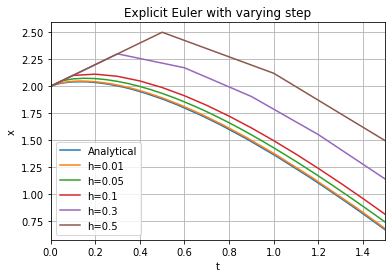

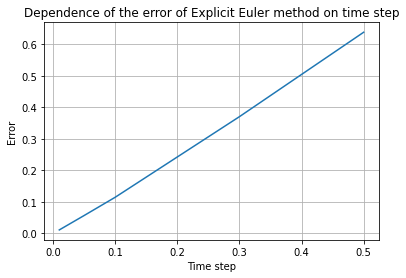

In [ ]:
# Аналіз стійкості явного методу Ейлера рівняння 1
Stiykist(Euler,f1,solution,H,0,1.5,2)

# Аналіз точності явного методу Ейлера рівняння 1
Tochnist1(Euler,f1,solution, H,0,1.5,2)

([0.01, 0.05, 0.1, 0.3, 0.5],
 [0.12195, 0.22277, 0.37362, 1.14528, 2.52734],
 (0, 6, 10, 'Explicit Euler'))

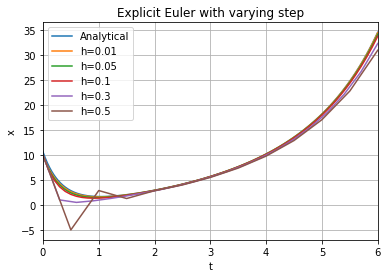

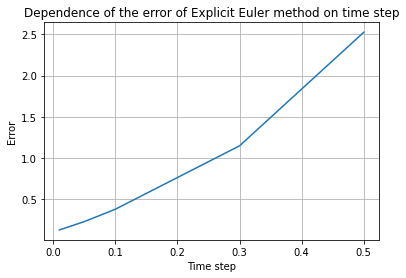

In [ ]:
# Аналіз стійкості явного методу Ейлера рівняння 2
Stiykist(Euler,f2, solution2,H,0,6,10)

# Аналіз точності явного методу Ейлера рівняння 2
Tochnist1(Euler,f2,solution2,H,0,6,10)

([0.01, 0.05, 0.1, 0.3, 0.5],
 [0.09469, 0.13996, 0.26929, 0.89149, 1.62261],
 (0, 6, 10, 'Implicit Euler'))

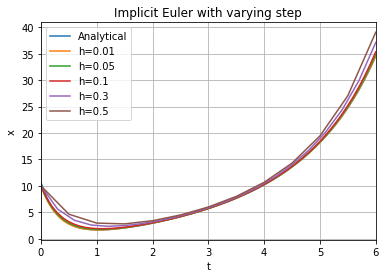

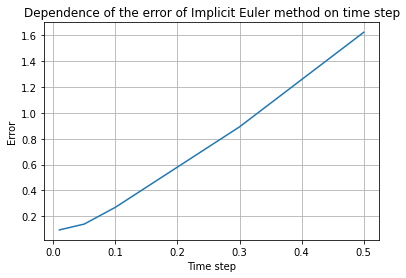

In [ ]:
# Аналіз стійкості неявного методу Ейлера рівняння 2
Stiykist(EulerImp,f2ImpEu, solution2,H,0,6,10)

# Аналіз точності неявного методу Ейлера рівняння 2
Tochnist1(EulerImp,f2ImpEu,solution2,H,0,6,10)

([0.01, 0.05, 0.1, 0.3, 0.5],
 [0.10543, 0.11125, 0.11842, 0.14354, 0.19301],
 (0, 6, 10, 'Runge 4 order'))

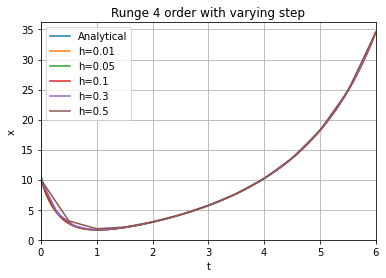

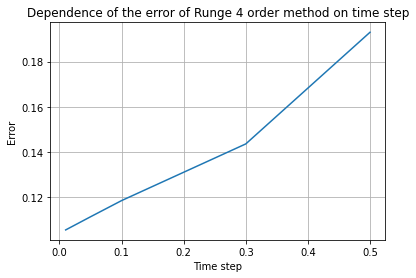

In [ ]:
# Аналіз стійкості явного методу Рунге рівняння 2
Stiykist(Runge,f2, solution2,H,0,6,10)

# Аналіз точності явного методу Рунге рівняння 2
Tochnist1(Runge,f2,solution2,H,0,6,10)

([0.01, 0.05, 0.1, 0.3, 0.5],
 [0.10495, 0.10452, 0.10601, 0.42164, 2.31626],
 (0, 6, 10, 'Adams 2-points Explicit'))

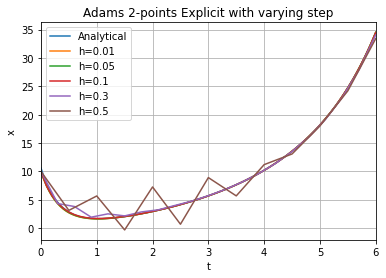

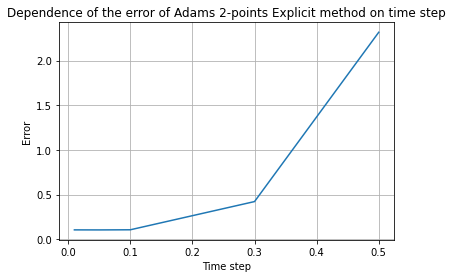

In [ ]:
# Аналіз стійкості явного методу Адамса рівняння 2
Stiykist(Adams2E,f2, solution2,H,0,6,10)

# Аналіз точності явного методу Адамса рівняння 2
Tochnist1(Adams2E,f2,solution2,H,0,6,10)

([0.01, 0.05, 0.1, 0.3, 0.5],
 [0.10543, 0.11108, 0.11778, 0.14257, 0.21138],
 (0, 6, 10, 'Adams 2-points Implicit'))

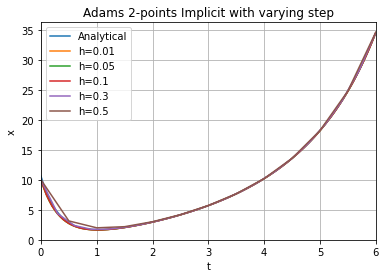

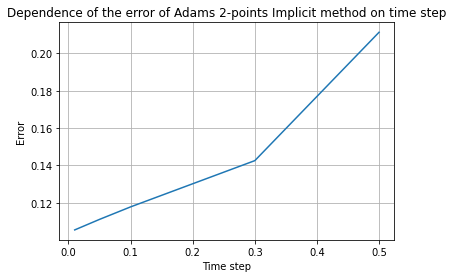

In [ ]:
# Аналіз стійкості неявного методу Адамса рівняння 2
StiykistAdams2I(Adams2I,f2ImpAd, f2, solution2,H,0,6,10)

# Аналіз точності неявного методу Адамса
Tochnist1Ad2I(Adams2I,f2ImpAd,f2, solution2,H,0,6,10)

# Завдання 2

Пропишемо функції, які задаватимуть всі методи розв'язання дифрівнянь 2 порядку

In [ ]:
# Явний метод Ейлера для 2 порядку
def Euler2(function,n, t0, tf, x0, x10): #задаємо назву методу,що залежить від рівняння; від кількості кроків, з яким його будемо розв'язувати; та початкового і кінцевого часів розв'язку; та початкової умови
# function - функція, задана дифрівнянням, яка визначає швидкість приросту координати
    h=round((tf-t0)/n,3) #обчислюємо крок
    t=[round(t0+i*h,3) for i in range(n+1)] #Створюємо таблицю дискретного часу
    x=[x0] #Створюємо масив, який поки що містить 1 елемент (нульовий елемент - початкова умова)
    x1=[x10] #Створюємо масив, який поки що містить 1 елемент (нульовий елемент - початкова умова)
    for i in range(n): # Заходимо в цикл, що складається з n кроків
        x1=x1+[round(x1[i]+function(t[i],x[i],x1[i])*h,3)] # Рядок заповнює таблицю швидкостей на основі заданого дифрівнянням прискорення
        x=x+[round(x[i]+h*x1[i],3)] # Додаємо до таблиці координат новобчислений елемент, що міститься в квадратних дужках
    return  (t,x,x1,(h,t0,tf,x0,x10,'Explicit Euler')) #Результат, який отримаємо при виклику функції

# Напівнеявний метод Ейлера для 2 порядку (метод Ейлера-Кромера)
def EulerCromer2(function,n, t0, tf, x0, x10): #задаємо назву методу,що залежить від рівняння; від кількості кроків, з яким його будемо розв'язувати; та початкового і кінцевого часів розв'язку; та початкової умови
# function - функція, задана дифрівнянням, яка визначає швидкість приросту координати
    h=round((tf-t0)/n,3) #обчислюємо крок
    t=[round(t0+i*h,3) for i in range(n+1)] #Створюємо таблицю дискретного часу
    x=[x0] #Створюємо масив, який поки що містить 1 елемент (нульовий елемент - початкова умова)
    x1=[x10] #Створюємо масив, який поки що містить 1 елемент (нульовий елемент - початкова умова)
    for i in range(n): # Заходимо в цикл, що складається з n кроків
        x1=x1+[round(x1[i]+function(t[i],x[i],x1[i])*h,3)] # Рядок заповнює таблицю швидкостей на основі заданого дифрівнянням прискорення
        x=x+[round(x[i]+h*x1[i+1],3)] # Додаємо до таблиці координат новобчислений елемент, що міститься в квадратних дужках
    return  (t,x,x1,(h,t0,tf,x0,x10,'Euler Cromer')) #Результат, який отримаємо при виклику функції

# Метод серединної точки для 2 порядку
def Midpoint2(function,n, t0, tf, x0, x10): #задаємо назву методу,що залежить від рівняння; від кількості кроків, з яким його будемо розв'язувати; та початкового і кінцевого часів розв'язку; та початкової умови
# function - функція, задана дифрівнянням, яка визначає швидкість приросту координати
    h=round((tf-t0)/n,3) #обчислюємо крок
    t=[round(t0+i*h,3) for i in range(n+1)] #Створюємо таблицю дискретного часу
    x=[x0] #Створюємо масив, який поки що містить 1 елемент (нульовий елемент - початкова умова)
    x1=[x10] #Створюємо масив, який поки що містить 1 елемент (нульовий елемент - початкова умова)
    for i in range(n): # Заходимо в цикл, що складається з n кроків
        x1=x1+[round(x1[i]+function(t[i],x[i],x1[i])*h,3)] # Рядок заповнює таблицю швидкостей на основі заданого дифрівнянням прискорення
        x=x+[round(x[i]+h*(x1[i]+x1[i+1])/2,3)] # Додаємо до таблиці координат новобчислений елемент, що міститься в квадратних дужках
    return  (t,x,x1,(h,t0,tf,x0, x10,'Midpoint')) #Результат, який отримаємо при виклику функції

# Метод Верле
def Verlet2(function,functionVerlet,n, t0, tf, x0, x10): #задаємо назву методу,що залежить від рівняння; від кроку, з яким його будемо розв'язувати; та початкового і кінцевого часів розв'язку; та початкової умови
# functionVerlet - функція, виведена з дифрівняння для методу Верле
    h=round((tf-t0)/n,3) #обчислюємо крок
    t=[round(t0+i*h,3) for i in range(n+1)] #Створюємо таблицю дискретного часу
    x=[x0] #Створюємо масив, який поки що містить 1 елемент (нульовий елемент - початкова умова)
    x1=[x10] #Створюємо масив, який поки що містить 1 елемент (нульовий елемент - початкова умова)
    i=0 # Перший крок - методом серединної точки
    x1=x1+[round(x1[i]+function(t[i],x[i],x1[i])*h,3)] # Рядок заповнює таблицю швидкостей на основі заданого дифрівнянням прискорення
    x=x+[round(x[i]+h*(x1[i]+x1[i+1])/2,3)] # Додаємо до таблиці координат новобчислений елемент, що міститься в квадратних дужках
    for i in range(n-1): # Заходимо в цикл, що складається з (n-1) кроків
        x=x+[round(functionVerlet(t[i], x[i], x[i+1], x1[i], h),3)] # Додаємо до таблиці координат новобчислений елемент, що міститься в квадратних дужках
        if i!=0:
            x1=x1+[round((x[i+2]-x[i])/2/h,3)]
    return  (t,x,x1,(h,t0,tf,x0,x10,'Verlet Integration')) #Результат, який отримаємо при виклику функції

# Метод Верле швидкісний
def VeloVerlet2(function,funcVeloVerlet,n, t0, tf, x0, x10): #задаємо назву методу,що залежить від рівняння; від кроку, з яким його будемо розв'язувати; та початкового і кінцевого часів розв'язку; та початкової умови
# functionVerlet - функція, виведена з дифрівняння для методу Верле
    h=round((tf-t0)/n,3) #обчислюємо крок
    t=[round(t0+i*h,3) for i in range(n+1)] #Створюємо таблицю дискретного часу
    x=[x0] #Створюємо масив, який поки що містить 1 елемент (нульовий елемент - початкова умова)
    x1=[x10] #Створюємо масив, який поки що містить 1 елемент (нульовий елемент - початкова умова)
    for i in range(n): # Заходимо в цикл, що складається з (n) кроків
        x=x+[round(x[i]+x1[i]*h+function(t[i],x[i],x1[i])*h*h/2,3)] # Додаємо до таблиці координат новобчислений елемент, що міститься в квадратних дужках
        x1=x1+[round(funcVeloVerlet(t[i], x[i], x[i+1], x1[i], h),3)]
    return  (t,x,x1,(h,t0,tf,x0,x10,'Verlet Integration')) #Результат, який отримаємо при виклику функції

# Функція оцінки похибки
def RelEr (Method, function, solution, n, t0, tf, x0, x10): #задаємо назву методу, буде розв'язувати задане рівняння при даній початковій умові з різними кроками з масиву Н, додатково треба буде задати аналітичний розв'язок
    (T,X,X1,Opis)=Method(function, n, t0, tf, x0, x10) #З і-м кроком розв'язуємо рівняння заданим методом
    Sol=[round(solution(T[i]),3) for i in range(len(T))] # Таблиця значень функції аналітичного розв'язку
    RelError=round(math.sqrt(np.sum([((Sol[i]-X[i])/Sol[i] if Sol[i]!=0 else 0)**2 for i in range(len(T))])/(len(T))),5)
    return(RelError)

# Функція оцінки похибки для методу Верле
def RelErV (Method, function, functionVerlet,solution, n, t0, tf, x0, x10): #задаємо назву методу, буде розв'язувати задане рівняння при даній початковій умові з різними кроками з масиву Н, додатково треба буде задати аналітичний розв'язок
    (T,X,X1,Opis)=Method(function, functionVerlet, n, t0, tf, x0, x10) #З і-м кроком розв'язуємо рівняння заданим методом
    Sol=[round(solution(T[i]),3) for i in range(len(T))] # Таблиця значень функції аналітичного розв'язку
    RelError=round(math.sqrt(np.sum([((Sol[i]-X[i])/Sol[i] if Sol[i]!=0 else 0)**2 for i in range(len(T))])/(len(T))),5)
    return(RelError)

Задамо дані за варіантом

In [ ]:
t0=13.7
tf=19
x0=11.3
x10=5

def fzavd2(t,x,x1):
    return (5*x1-4*t*t*math.cos(7*t)-4*t**3*math.sin(t)) #Функція, задана дифрівнянням у 2 завданні, яка визначає прискорення

def solution2zavd(t):
    return round(0.153846*t**3*math.sin(t) + 2.48521*t**2*math.sin(t) + 0.03861*t**2*math.sin(7*t) +
     (0.0540541*t**2 + 0.0256406*t - 0.00240854)*math.cos(7*t) + (-0.769231*t**3 + 0.035503*t**2 + 4.82021*t + 0.00504184)*math.cos(t) 
     - 7.00979*10**(-28)*math.exp(5*t) + 0.030041*t*math.sin(t) - 0.0204529*t*math.sin(7*t) - 4.795*math.sin(t) - 0.00538334*math.sin(7*t) + 428.293,3)

def Verlet(t,xi,xi1,x1i,h):
    f=((2*xi1-xi+h*h*(-2.5*xi/h-4*t*t*math.cos(7*t)-4-t**3*math.sin(t)))/(1-2.5*h)) #Функція, виведена з дифрівняння 2 порядку для методу Верле
    return f

def VeloVerlet(t,xi,xi1,x1i,h):
    f=(x1i+0.5*h*(fzavd2(t,xi,x1i)-4*(t+h)**2*math.cos(7*(t+h))-
    4*(t+h)**3*math.sin(t+h))/(1-2.5*h)) #Функція, виведена з дифрівняння 2 порядку для методу Верле
    return f

def f2ImpAd(t,x,x1,h):
    return (x1+5/3*h*(t+2*h)+2/3*h*f2((t+h),x1)-h*12*f2(t,x))/(1+1.25*h-0.25/12*h*(t+2*h)) #Функція, виведена з дифрівняння 1 для неявного методу Адамса

Виведемо розв'язки кожним методом, щоб проаналізувати чи все працює як слід

In [ ]:
(T,X,X1,Opis)=Euler2(fzavd2,20,t0,tf,x0,x10)
S=[solution2zavd(T[i]) for i in range(len(T))]
print(X)
print(EulerCromer2(fzavd2,20,t0,tf,x0,x10)[1])
print(Midpoint2(fzavd2,20,t0,tf,x0,x10)[1])
print(Verlet2(fzavd2,Verlet,20,t0,tf,x0,x10)[1])
print(VeloVerlet2(fzavd2,VeloVerlet,20,t0,tf,x0,x10)[1])
print(S)
print(RelEr(Midpoint2,fzavd2,solution2zavd,20,t0,tf,x0,x10))
print(RelErV(Verlet2,fzavd2,Verlet,solution2zavd,20,t0,tf,x0,x10))

[11.3, 12.625, -634.371, -2841.19, -8812.379, -23531.772, -58430.58, -140167.274, -330676.796, -773739.931, -1803687.609, -4197949.272, -9763888.686, -22703605.593, -52787229.824, -122730319.63, -285346466.164, -663427544.406, -1542464861.369, -3586225586.445, -8337968531.691]
[11.3, -635.696, -2842.515, -8813.704, -23533.097, -58431.905, -140168.599, -330678.121, -773741.256, -1803688.934, -4197950.597, -9763890.011, -22703606.918, -52787231.149, -122730320.955, -285346467.489, -663427545.731, -1542464862.694, -3586225587.77, -8337968533.016, -19385770738.127]
[11.3, -311.536, -1738.443, -5827.447, -16172.738, -40981.838, -99299.589, -235422.697, -552209.025, -1288714.432, -3000819.103, -6980919.641, -16233747.801, -37745418.37, -87758775.388, -204038393.558, -474387005.946, -1102946203.549, -2564345224.569, -5962097059.73, -13861869634.908]
[11.3, -311.536, -2374.644, -12944.913, -65713.058, -326343.385, -1610563.178, -7936968.156, -39100863.247, -192611925.626, -948795808.982, -4673

Зробимо зменшення кроку вдвічі, щоб зменшити похибку до потрібного значення

In [ ]:
n0=20
for i in range(10):
    n=n0*(2**i)
    E=RelEr(Midpoint2,fzavd2,solution2zavd,n,t0,tf,x0,x10)
    print('n=', n, 'Error = ', E)
    if E<=0.1:
      break


n= 20 Error =  0.89604
n= 40 Error =  0.85001
n= 80 Error =  0.75022
n= 160 Error =  0.58929
n= 320 Error =  0.41787
n= 640 Error =  0.50098
n= 1280 Error =  0.20645
n= 2560 Error =  0.08824


In [ ]:
n0=20
for i in range(10):
    n=n0*(2**i)
    E=RelErV(Verlet2,fzavd2,Verlet, solution2zavd,n,t0,tf,x0,x10)
    print('n=', n, 'Error = ', E)
    if E<=0.1:
      break

n= 20 Error =  20.67035
n= 40 Error =  0.37836
n= 80 Error =  0.62798
n= 160 Error =  0.71108
n= 320 Error =  0.7834
n= 640 Error =  13.78198
n= 1280 Error =  10.74929
n= 2560 Error =  8.00786
n= 5120 Error =  6.04848
n= 10240 Error =  4.31278


# Завдання 2: розв'язок системи

Задамо метод Рунге-Кути для розв'язання системи рівнянь

In [ ]:
# Метод Рунге-Кути для системи з 2 рівнянь
def Runge2(function, n, t0, tf, x0, x10): #задаємо назву методу,що залежить від рівняння; від кроку, з яким його будемо розв'язувати; та початкового і кінцевого часів розв'язку; та початкової умови
# function - функція, задана дифрівнянням, яка визначає швидкість приросту координати
    h=round((tf-t0)/n,3) #обчислюємо крок
    t=[round(t0+i*h,3) for i in range(n+1)] #Створюємо таблицю дискретного часу
    x=[x0] #Створюємо масив, який поки що містить 1 елемент (нульовий елемент - початкова умова)
    x1=[x10] #Створюємо масив, який поки що містить 1 елемент (нульовий елемент - початкова умова)
    for i in range(n): # Заходимо в цикл, що складається з n кроків
        k1x1=function(t[i],x[i],x1[i])[0] #Обчислюємо к1 для швидкості за м. Рунге-Кути 4 порядку
        k1x=function(t[i],x[i],x1[i])[1] #Обчислюємо к1 для координати за м. Рунге-Кути 4 порядку
        (k2x1,k2x)=function(t[i]+h/2,x[i]+h*k1x/2,x1[i]+h*k1x1/2)
        (k3x1,k3x)=function(t[i]+h/2,x[i]+h*k2x/2,x1[i]+h*k2x1/2)
        (k4x1,k4x)=function(t[i]+h,x[i]+h*k3x,x1[i]+h*k3x1)
        x=x+[round(x[i]+h/6*(k1x+2*k2x+2*k3x+k4x),3)] # Додаємо до таблиці координат новобчислений елемент, що міститься в квадратних дужках
        x1=x1+[round(x1[i]+h/6*(k1x1+2*k2x1+2*k3x1+k4x1),3)] # Додаємо до таблиці координат новобчислений елемент, що міститься в квадратних дужках
    return  (t,x,x1,(h,t0,tf,x0,x10,'Runge 4 order')) #Результат, який отримаємо при виклику функції

Задамо умови задачі, перетворивши дифрівняння на систему

In [ ]:
t0=13.7
tf=19
x0=11.3
x10=5

def fzavd2syst(t,x,x1):
    f1=(5*x1-4*t*t*math.cos(7*t)-4*t**3*math.sin(t)) #Функція, задана дифрівнянням у 2 завданні, яка визначає прискорення
    f2=x1 #Функція для швидкості, отримана з представлення рівняння руху у вигляді системи
    return (f1,f2)

Збільшуючи кількість кроків вдвічі спробуємо досягти потрібної похибки методом Рунге-Кути

In [ ]:
print(RelEr(Runge2,fzavd2syst,solution2zavd,20,t0,tf,x0,x10))

n0=20
for i in range(10):
    n=n0*(2**i)
    E=RelEr(Runge2,fzavd2syst,solution2zavd,n,t0,tf,x0,x10)
    print('n=', n, 'Error = ', E)
    if E<=0.01:
      break

0.12424
n= 20 Error =  0.12424
n= 40 Error =  0.01446
n= 80 Error =  0.00116


# Завдання 3


In [ ]:
# Прогонка для координати х
def ProgonkaX(t0,tf,x0,xf,n,k):
    h=round((tf-t0)/n,3) #обчислюємо крок
    t=[round(t0+i*h,3) for i in range(n+1)] #Створюємо таблицю дискретного часу
    x=[0 for i in range(n+1)] #Створюємо масив-заготовку для координати, у якого всі елементи - None
    x[0]=x0 #Задаємо першу крайову умову: початкова координата
    x[-1]=xf #Задаємо другу крайову умову: кінцева координата
    a=[0 for i in range(n+1)] #Створюємо масив-заготовку для коефіцієнтів прогонки, у якого всі елементи - None
    b=[0 for i in range(n+1)] #Створюємо масив-заготовку для коефіцієнтів прогонки, у якого всі елементи - None
    a[1]=x[0]*(1-k/2*h)/2
    b[1]=(2+k*h)/4
    for i in range(1,n-1):
      a[i+1]=a[i]*(2-k*h)/(4+k*b[i]*h-2*b[i])
      b[i+1]=(2+k*h)/(4+k*b[i]*h-2*b[i])
    for i in reversed(range(1,n)):
      x[i]=a[i]+b[i]*x[i+1]
    return(t,x)

# Прогонка для координати y
def ProgonkaY(t0,tf,y0,yf,n,k):
    h=round((tf-t0)/n,3) #обчислюємо крок
    t=[round(t0+i*h,3) for i in range(n+1)] #Створюємо таблицю дискретного часу
    y=[0 for i in range(n+1)] #Створюємо масив-заготовку для координати, у якого всі елементи - None
    y[0]=y0 #Задаємо першу крайову умову: початкова координата
    y[-1]=yf #Задаємо другу крайову умову: кінцева координата
    a=[0 for i in range(n+1)] #Створюємо масив-заготовку для коефіцієнтів прогонки, у якого всі елементи - None
    b=[0 for i in range(n+1)] #Створюємо масив-заготовку для коефіцієнтів прогонки, у якого всі елементи - None
    a[1]=y[0]*(1-k/2*h)/2+4.9*h*h
    b[1]=(2+k*h)/4
    for i in range(1,n-1):
      a[i+1]=a[i]*(2-k*h)/(4+k*b[i]*h-2*b[i])+9.8*(2*h*h/(4+k*b[i]*h-2*b[i]))
      b[i+1]=(2+k*h)/(4+k*b[i]*h-2*b[i])
    for i in reversed(range(1,n)):
      y[i]=a[i]+b[i]*y[i+1]
    return(t,y)


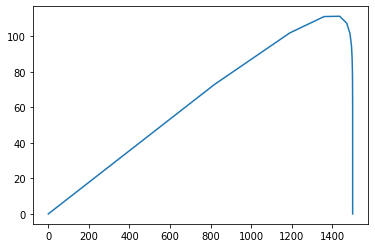

In [ ]:
# Задаємо умови: варіант 31
k=1
l=1500
xf=l
x0=0
y0=0
yf=0
t0=0
tf=15
n=20

(T,X)=ProgonkaX(t0,tf,x0,xf,n,k)
Y=ProgonkaY(t0,tf,y0,yf,n,k)[1]
#print(T)
#print(X)
#print(Y)

plt.plot(X,Y)

In [ ]:
# Метод стрільби
# Розв'яжемо як систему методом Рунге-Кути

# Метод Рунге-Кути для системи з 2 рівнянь Runge2(function, n, t0, tf, x0, x10)
# return  (t,x,x1,(h,t0,tf,x0,x10,'Runge 4 order'))

def fzavd3X(t,x,x1):
    f1=(-k*x1) #Функція, задана дифрівнянням у 2 завданні, яка визначає прискорення
    f2=x1 #Функція для швидкості, отримана з представлення рівняння руху у вигляді системи
    return (f1,f2)

def fzavd3Y(t,y,y1):
    f1=(-k*y1-9.8) #Функція, задана дифрівнянням у 2 завданні, яка визначає прискорення
    f2=y1 #Функція для швидкості, отримана з представлення рівняння руху у вигляді системи
    return (f1,f2)


# Задаємо умови: варіант 31
k=1
l=1500
xf=l
x0=0
y0=0
yf=0
t0=0
tf=15
n=20

# Підбираємо початкову швидкість - перший вистріл
x10=2000
y10=100

XS=Runge2(fzavd3X, n, t0, tf, x0, x10)[1]
YS=Runge2(fzavd3Y, n, t0, tf, y0, y10)[1]

print(XS)
print(YS)

[0, 1051.758, 1550.418, 1786.844, 1898.938, 1952.084, 1977.282, 1989.229, 1994.893, 1997.579, 1998.852, 1999.456, 1999.742, 1999.878, 1999.942, 1999.973, 1999.987, 1999.994, 1999.997, 1999.999, 2000.0]
[0, 50.392, 70.418, 76.048, 74.852, 70.42, 64.453, 57.759, 50.72, 43.517, 36.237, 28.92, 21.586, 14.243, 6.897, -0.451, -7.8, -15.15, -22.5, -29.85, -37.2]


In [ ]:
# Розв'яжемо для Х
# Метод звуження інтервалу вдвічі

x101=50 # При цьому значенні недолітаємо, швидкість пристрілки
x102=2000 #При цьому значенні перелітаємо

# Задамо цикл на звуження проміжку вдвічі поки не прилетимо куди слід
d=0.001 #Допустима похибка координати в кінці руху
for i in range(30):
        x103=math.tan((math.atan(x101)+math.atan(x102))/2)
        C=Runge2(fzavd3X, n, t0, tf, x0, x103)[1][-1]
        #print('Швидкість',x103,'кінцева координата',C)
        if abs((C-xf))<d:
          x10=x103
          print(x103)
          break
        elif (C-xf)<0:
          x101=x103
        else:
          x102=x103


1500.001481695995


In [ ]:
# Розв'яжемо для Y
# Метод звуження інтервалу вдвічі

y101=100 # При цьому значенні недолітаємо, швидкість пристрілки
y102=200 #При цьому значенні перелітаємо

# Задамо цикл на звуження проміжку вдвічі поки не прилетимо куди слід
d=0.001 #Допустима похибка координати в кінці руху
for i in range(30):
        y103=math.tan((math.atan(y101)+math.atan(y102))/2)
        C=Runge2(fzavd3Y, n, t0, tf, y0, y103)[1][-1]
        #print('Швидкість',y103,'кінцева координата',C)
        if abs((C-yf))<d:
          y10=y103
          print(y103)
          break
        elif (C-yf)<0:
          y101=y103
        else:
          y102=y103

137.20018948282612


[0, 788.819, 1162.815, 1340.134, 1424.205, 1464.065, 1482.963, 1491.923, 1496.171, 1498.185, 1499.14, 1499.593, 1499.808, 1499.909, 1499.957, 1499.98, 1499.991, 1499.996, 1499.999, 1500.0, 1500.001]
[0, 69.954, 99.256, 109.283, 110.172, 106.728, 101.23, 94.758, 87.824, 80.672, 73.416, 66.11, 58.781, 51.441, 44.096, 36.748, 29.399, 22.05, 14.7, 7.35, 0.0]


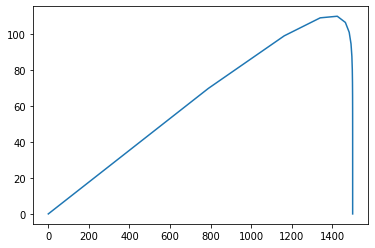

In [ ]:
# Вводимо знайдені початкові швидкості методом звуження інтервалу
x10=1500.001481695995
y10=137.20018948282612

XS=Runge2(fzavd3X, n, t0, tf, x0, x10)[1]
YS=Runge2(fzavd3Y, n, t0, tf, y0, y10)[1]

print(XS)
print(YS)

plt.plot(XS,YS)

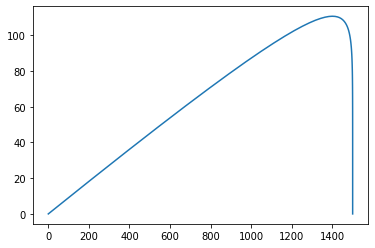

In [ ]:
# Розв'яжемо для Х
# Метод для лінійних задач

# Робимо дві пристрілки: будь-які
x101=2000
x102=3000

XS1=Runge2(fzavd3X, n, t0, tf, x0, x101)[1]
XS2=Runge2(fzavd3X, n, t0, tf, x0, x102)[1]

B1=XS1[-1]
B2=XS2[-1] #Відповідно до формул лекція 3-4 слайд 45

# Створюємо таблицю розв'язку як суму двох пристрілочних розв'язків
XStr=[((xf-B2)*XS1[i]+(B1-xf)*XS2[i])/(B1-B2) for i in range(len(XS1))]

# Розв'яжемо для Y
# Метод для лінійних задач

# Робимо дві пристрілки
y101=10
y102=20

YS1=Runge2(fzavd3Y, n, t0, tf, y0, y101)[1]
YS2=Runge2(fzavd3Y, n, t0, tf, y0, y102)[1]

B1=YS1[-1]
B2=YS2[-1] #Відповідно до формул лекція 3-4 слайд 45

# Створюємо таблицю розв'язку як суму двох пристрілочних розв'язків
YStr=[((yf-B2)*YS1[i]+(B1-yf)*YS2[i])/(B1-B2) for i in range(len(YS1))]

plt.plot(XStr,YStr)

# Завдання 4

Систему розв'язували в завданні 2:розв'язок системи. Візьмемо звідти метод Рунге та просто перепишемо умову задачі

In [ ]:
# Метод Рунге-Кути для системи з 2 рівнянь
def Runge2(function, n, t0, tf, x0, y0): #задаємо назву методу,що залежить від рівняння; від кроку, з яким його будемо розв'язувати; та початкового і кінцевого часів розв'язку; та початкової умови
# function - функція, задана системою дифрівнянь
    h=round((tf-t0)/n,3) #обчислюємо крок
    t=[round(t0+i*h,3) for i in range(n+1)] #Створюємо таблицю дискретного часу
    x=[x0] #Створюємо масив, який поки що містить 1 елемент (нульовий елемент - початкова умова) для 1ї популяції
    y=[y0] #Створюємо масив, який поки що містить 1 елемент (нульовий елемент - початкова умова) для 2ї популяції
    for i in range(n): # Заходимо в цикл, що складається з n кроків
        k1x=function(t[i],x[i],y[i])[0] #Обчислюємо к1 для швидкості за м. Рунге-Кути 4 порядку
        k1y=function(t[i],x[i],y[i])[1] #Обчислюємо к1 для координати за м. Рунге-Кути 4 порядку
        (k2x,k2y)=function(t[i]+h/2,x[i]+h*k1x/2,y[i]+h*k1y/2)
        (k3x,k3y)=function(t[i]+h/2,x[i]+h*k2x/2,y[i]+h*k2y/2)
        (k4x,k4y)=function(t[i]+h,x[i]+h*k3x,y[i]+h*k3y)
        x=x+[round(x[i]+h/6*(k1x+2*k2x+2*k3x+k4x),3)] # Додаємо до таблиці координат новобчислений елемент, що міститься в квадратних дужках
        y=y+[round(y[i]+h/6*(k1y+2*k2y+2*k3y+k4y),3)] # Додаємо до таблиці координат новобчислений елемент, що міститься в квадратних дужках
    return  (t,x,y,(h,t0,tf,x0,y0,'Runge 4 order')) #Результат, який отримаємо при виклику функції



[15, 17.54, 18.979, 19.742, 20.127, 20.312, 20.392, 20.419, 20.419, 20.406, 20.386, 20.362, 20.337, 20.311, 20.285, 20.259, 20.233, 20.207, 20.181, 20.155, 20.13, 20.104, 20.079, 20.054, 20.029, 20.004, 19.98, 19.955, 19.931, 19.907, 19.883, 19.859, 19.836, 19.813, 19.789, 19.766, 19.743, 19.72, 19.697, 19.675, 19.653, 19.63, 19.608, 19.586, 19.564, 19.542, 19.521, 19.499, 19.478, 19.457, 19.436, 19.415, 19.394, 19.373, 19.353, 19.332, 19.312, 19.292, 19.272, 19.252, 19.232, 19.212, 19.192, 19.173, 19.154, 19.135, 19.116, 19.097, 19.078, 19.059, 19.04, 19.022, 19.003, 18.985, 18.967, 18.949, 18.931, 18.913, 18.895, 18.877, 18.859, 18.841, 18.824, 18.807, 18.79, 18.773, 18.755, 18.738, 18.721, 18.705, 18.688, 18.671, 18.655, 18.638, 18.622, 18.606, 18.59, 18.574, 18.558, 18.542, 18.526, 18.51, 18.495, 18.48, 18.465, 18.449, 18.434, 18.419, 18.404, 18.389, 18.374, 18.359, 18.344, 18.329, 18.315, 18.3, 18.285, 18.271, 18.257, 18.243, 18.229, 18.215, 18.201, 18.187, 18.173, 18.159, 18.145,

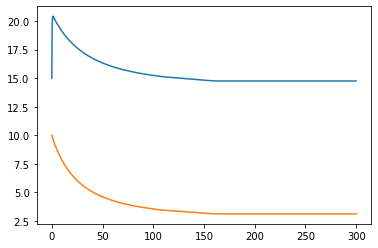

In [ ]:
# Задаємо систему рівнянь

def func4zavd(t,x,y):
    funcX=a*(1-x/k1)*x-b/(k2-x)*x*y
    funcY=(c-d*y/x)*y
    return (funcX,funcY)

# Задаємо умови задачі варіант 31
x0=15
y0=10
a=1.4
b=2.9
c=0.02
d=0.1
k1=9.9
k2=1.6

#Будуємо графіки розв'язків
(T,X,Y,opys)=Runge2(func4zavd,2000,0,300,x0,y0)

print(X)
print(Y)
plt.plot(T,X)
plt.plot(T,Y)

# Завдання 1. Точність методом подвійного прорахунку

In [2]:
# Явний метод Ейлера
def Euler(function,h, t0, tf, x0): #задаємо назву методу,що залежить від рівняння; від кроку, з яким його будемо розв'язувати; та початкового і кінцевого часів розв'язку; та початкової умови
# function - функція, задана дифрівнянням, яка визначає швидкість приросту координати
    n=math.ceil((tf-t0)/h) #обчислюємо кількість кроків
    t=[round(t0+i*h,3) for i in range(n+1)] #Створюємо таблицю дискретного часу
    x=[x0] #Створюємо масив, який поки що містить 1 елемент (нульовий елемент - початкова умова)
    # x1=[] Рядок формує заготовку для таблиці швидкостей зростання функції - 1 похідна
    for i in range(n): # Заходимо в цикл, що складається з n кроків
        # x1=x1+[function(t[i], x[i])] Рядок заповнює таблицю швидкостей
        x=x+[round(x[i]+h*function(t[i], x[i]),3)] # Додаємо до таблиці координат новобчислений елемент, що міститься в квадратних дужках
    return  (t,x,(h,t0,tf,x0,'Explicit Euler')) #Результат, який отримаємо при виклику функції


# Неявний метод Ейлера
def EulerImp(functionImplicit,h, t0, tf, x0): #задаємо назву методу,що залежить від рівняння; від кроку, з яким його будемо розв'язувати; та початкового і кінцевого часів розв'язку; та початкової умови
# functionImplicit - функція, виведена з дифрівняння для неявного методу Ейлера
    n=math.ceil((tf-t0)/h) #обчислюємо кількість кроків
    t=[round(t0+i*h,3) for i in range(n+1)] #Створюємо таблицю дискретного часу
    x=[x0] #Створюємо масив, який поки що містить 1 елемент (нульовий елемент - початкова умова)
    for i in range(n): # Заходимо в цикл, що складається з n кроків
        x=x+[round(functionImplicit(t[i+1], x[i], h),3)] # Додаємо до таблиці координат новобчислений елемент, що міститься в квадратних дужках
    return  (t,x,(h,t0,tf,x0,'Implicit Euler')) #Результат, який отримаємо при виклику функції

# Метод Рунге-Кути
def Runge(function,h, t0, tf, x0): #задаємо назву методу,що залежить від рівняння; від кроку, з яким його будемо розв'язувати; та початкового і кінцевого часів розв'язку; та початкової умови
# function - функція, задана дифрівнянням, яка визначає швидкість приросту координати
    n=math.ceil((tf-t0)/h) #обчислюємо кількість кроків
    t=[round(t0+i*h,3) for i in range(n+1)] #Створюємо таблицю дискретного часу
    x=[x0] #Створюємо масив, який поки що містить 1 елемент (нульовий елемент - початкова умова)
    # x1=[] Рядок формує заготовку для таблиці швидкостей зростання функції - 1 похідна
    for i in range(n): # Заходимо в цикл, що складається з n кроків
        k1=function(t[i],x[i]) #Обчислюємо к1 за м. Рунге-Кути 4 порядку
        k2=function(t[i]+h/2,x[i]+h*k1/2)
        k3=function(t[i]+h/2,x[i]+h*k2/2)
        k4=function(t[i]+h,x[i]+h*k3)
        x=x+[round(x[i]+h/6*(k1+2*k2+2*k3+k4),3)] # Додаємо до таблиці координат новобчислений елемент, що міститься в квадратних дужках
    return  (t,x,(h,t0,tf,x0,'Runge 4 order')) #Результат, який отримаємо при виклику функції


# Метод Адамса
def Adams2E(function,h, t0, tf, x0): #задаємо назву методу,що залежить від рівняння; від кроку, з яким його будемо розв'язувати; та початкового і кінцевого часів розв'язку; та початкової умови
# function - функція, задана дифрівнянням, яка визначає швидкість приросту координати
    n=math.ceil((tf-t0)/h) #обчислюємо кількість кроків
    t=[round(t0+i*h,3) for i in range(n+1)] #Створюємо таблицю дискретного часу
    x=[x0] #Створюємо масив, який поки що містить 1 елемент (нульовий елемент - початкова умова)
    # x1=[] Рядок формує заготовку для таблиці швидкостей зростання функції - 1 похідна
    # Перший крок робимо за Рунге
    i=0
    k1=function(t[i],x[i]) #Обчислюємо к1 за м. Рунге-Кути 4 порядку
    k2=function(t[i]+h/2,x[i]+h*k1/2)
    k3=function(t[i]+h/2,x[i]+h*k2/2)
    k4=function(t[i]+h,x[i]+h*k3)
    x=x+[round(x[i]+h/6*(k1+2*k2+2*k3+k4),3)] # Додаємо до таблиці координат новобчислений елемент, що міститься в квадратних дужках
    for i in range(n-1): # Заходимо в цикл, що складається з (n-1) кроків
        x=x+[round(x[i+1]+3/2*h*function(t[i+1],x[i+1])-h/2*function(t[i],x[i]),3)]
    return  (t,x,(h,t0,tf,x0,'Adams 2-points Explicit')) #Результат, який отримаємо при виклику функції

# Неявний метод Адамса
def Adams2I(functionImplicitAdams,function, h, t0, tf, x0): #задаємо назву методу,що залежить від рівняння; від кроку, з яким його будемо розв'язувати; та початкового і кінцевого часів розв'язку; та початкової умови
# functionImplicit - функція, виведена з дифрівняння для неявного методу Ейлера
    n=math.ceil((tf-t0)/h) #обчислюємо кількість кроків
    t=[round(t0+i*h,3) for i in range(n+1)] #Створюємо таблицю дискретного часу
    x=[x0] #Створюємо масив, який поки що містить 1 елемент (нульовий елемент - початкова умова)
    # Перший крок робимо за Рунге
    i=0
    k1=function(t[i],x[i]) #Обчислюємо к1 за м. Рунге-Кути 4 порядку
    k2=function(t[i]+h/2,x[i]+h*k1/2)
    k3=function(t[i]+h/2,x[i]+h*k2/2)
    k4=function(t[i]+h,x[i]+h*k3)
    x=x+[round(x[i]+h/6*(k1+2*k2+2*k3+k4),3)] # Додаємо до таблиці координат новобчислений елемент, що міститься в квадратних дужках
    for i in range(n-1): # Заходимо в цикл, що складається з (n-1) кроків
        x=x+[round(functionImplicitAdams(t[i], x[i], x[i+1], h),3)] # Додаємо до таблиці координат новобчислений елемент, що міститься в квадратних дужках t[i+1]=t[i]+h, t[i+2]=t[i]+2*h
    return  (t,x,(h,t0,tf,x0,'Adams 2-points Implicit')) #Результат, який отримаємо при виклику функції

Задаємо функцію для аналізу точності порівняно ***до чисельного розв'язку, але з удвічі меншим кроком***


---

Зміни для Tochnist 1 тут: 


```
        # Sol=[round(solution(T[i]),3) for i in range(len(T))] # Таблиця значень функції аналітичного розв'язку у нас відсутня
        # Замість цього розв'язуємо це ж рівняння але з кроком H[i]/2
        Sol=Method(function, H[i], t0, tf, x0)[1] #З і-м кроком поділеним навпіл розв'язуємо рівняння заданим методом
        # Після цього треба вирізати всі значення під непарними номерами
        Sol=np.array([Sol[2*i] for i in range(len(s2)//2+1)])
```

Зміни для Tochnist1Ad2I внести самостійно.


In [10]:
def Tochnist1 (Method, function, solution, H, t0, tf, x0): #задаємо назву методу, буде розв'язувати задане рівняння при даній початковій умові з різними кроками з масиву Н, додатково треба буде задати аналітичний розв'язок
    Error=[] #Створюємо порожній масив, як заготовку для значень похибки
    for i in range(len(H)): #Входимо в цикл, кількість повторень - кількість елементів в масиві кроків, які хочемо проаналізувати
        (T,X,Opis)=Method(function, H[i], t0, tf, x0) #З і-м кроком розв'язуємо рівняння заданим методом
        # Sol=[round(solution(T[i]),3) for i in range(len(T))] # Таблиця значень функції аналітичного розв'язку у нас відсутня
        # Замість цього розв'язуємо це ж рівняння але з кроком H[i]/2
        Sol=Method(function, H[i]/2, t0, tf, x0)[1] #З і-м кроком поділеним навпіл розв'язуємо рівняння заданим методом
        # Після цього треба вирізати всі значення під непарними номерами
        Sol=[Sol[2*i] for i in range(len(Sol)//2+1)]
        Error=Error+[round(math.sqrt(np.sum([(Sol[i]-X[i])**2 for i in range(len(T))])/(len(T))),5)] # Додаємо до таблиці похибок новобчислений елемент, що міститься в квадратних дужках
        # Округлений до 5 знаків після коми орінь з відношення суми елементів масиву ([(Sol[i]-X[i])**2 for i in range(len(T))]), що складається з квадратів різниць точних та чисельних значень, до кількості елементів
    fig, a = plt.subplots()
    a.plot(H,Error)
    plt.title('Dependence of the error of ' + Opis[4] + ' method on time step')
    plt.ylabel('Error')
    plt.xlabel('Time step')
    plt.grid(True)
    return(H,Error,(t0,tf,x0,Opis[4]))

def Tochnist1Ad2I (Method, functionImplicitAdams,function, solution, H, t0, tf, x0): #задаємо назву методу, буде розв'язувати задане рівняння при даній початковій умові з різними кроками з масиву Н, додатково треба буде задати аналітичний розв'язок
    Error=[] #Створюємо порожній масив, як заготовку для значень похибки
    for i in range(len(H)): #Входимо в цикл, кількість повторень - кількість елементів в масиві кроків, які хочемо проаналізувати
        (T,X,Opis)=Method(functionImplicitAdams,function, H[i], t0, tf, x0) #З і-м кроком розв'язуємо рівняння заданим методом
        Sol=[round(solution(T[i]),3) for i in range(len(T))] # Таблиця значень функції аналітичного розв'язку
        Error=Error+[round(math.sqrt(np.sum([(Sol[i]-X[i])**2 for i in range(len(T))])/(len(T))),5)] # Додаємо до таблиці похибок новобчислений елемент, що міститься в квадратних дужках
        # Округлений до 5 знаків після коми орінь з відношення суми елементів масиву ([(Sol[i]-X[i])**2 for i in range(len(T))]), що складається з квадратів різниць точних та чисельних значень, до кількості елементів
    fig, a = plt.subplots()
    a.plot(H,Error)
    plt.title('Dependence of the error of ' + Opis[4] + ' method on time step')
    plt.ylabel('Error')
    plt.xlabel('Time step')
    plt.grid(True)
    return(H,Error,(t0,tf,x0,Opis[4]))


Задаємо дифрівняння за варіантом 31, задаємо масив кроків для аналізу точності та стійкості, задаємо аналітичний розв'язок, функцію для неявного методу Ейлера

In [4]:
t0=0
tf=6
x0=10

def f2(t,x):
    return (-3*x+4*t+0.5*x*t) #Функція, задана дифрівнянням 2

def solution2(t):
    return (math.exp(0.25*t*t-3*t)*(-344696*math.erf(3-0.5*t)-8*math.exp(3*t-0.25*t*t)+344707))

def f2ImpEu(t,x,h):
    return ((x+4*h*t)/(1+3*h-0.5*h*t)) #Функція, виведена з дифрівняння 2 для неявного методу Ейлера

def f2ImpAd(t,x,x1,h):
    return (x1+5/3*h*(t+2*h)+2/3*h*f2((t+h),x1)-h/12*f2(t,x))/(1+1.25*h-2.5/12*h*(t+2*h)) #Функція, виведена з дифрівняння 1 для неявного методу Адамса

H=[0.01,0.05,0.1,0.3,0.5]

([0.01, 0.05, 0.1, 0.3, 0.5],
 [0.01507, 0.07416, 0.15638, 0.62238, 1.82857],
 (0, 6, 10, 'Explicit Euler'))

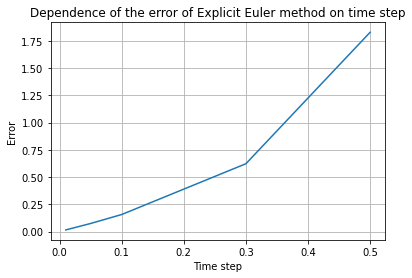

In [11]:
# Аналіз точності явного методу Ейлера рівняння 2
Tochnist1(Euler,f2,solution2,H,0,6,10)

([0.01, 0.05, 0.1, 0.3, 0.5],
 [0.0019, 0.00115, 0.00089, 0.01132, 0.12682],
 (0, 6, 10, 'Runge 4 order'))

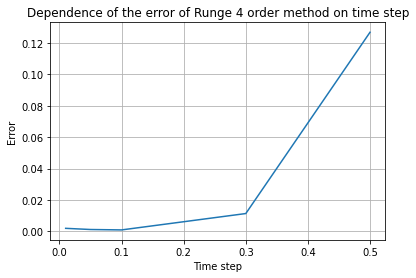

In [12]:
# Аналіз точності явного методу Рунге рівняння 2
Tochnist1(Runge,f2,solution2,H,0,6,10)